## 데이터 준비

In [251]:
#관련 라이브러리 불러오기
import pandas as pd #판다스
import matplotlib as mpl #맷플롭립
import matplotlib.pylab as plt #맷플롭립
import seaborn as sns #시본
import numpy as np # 넘파이
import plotly.express as px #플로틀리

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [252]:
file_path='data/data.csv' #data 폴더에 data.csv 파일 위치해 있음.
df = pd.read_csv(file_path, encoding='cp949') #read csv() 함수로 데이터프레임 변환
df

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기
0,8620,기아,2015,대형,7.6,425.0,52.0,가솔린,0,0,5038.0,2105.0,자동
1,11150,현대,2015,대형,8.1,416.0,52.0,가솔린,0,0,5038.0,2065.0,자동
2,14570,현대,2015,대형,7.4,416.0,52.0,가솔린,0,0,5038.0,2145.0,자동
3,10687,쌍용,2015,대형,7.5,306.0,45.0,가솔린,0,0,4966.0,2070.0,자동
4,9324,쌍용,2015,대형,7.6,306.0,45.0,가솔린,0,0,4966.0,1960.0,자동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,43.0,6.7,LPG,1,0,796.0,735.0,수동
405,958,대우,2015,경형,9.2,43.0,6.7,LPG,1,0,796.0,865.0,수동
406,964,대우,2015,경형,9.0,41.0,6.7,LPG,1,0,796.0,905.0,수동
407,904,대우,2013,경형,9.9,41.0,6.7,LPG,1,0,796.0,865.0,수동


주어진 데이터는 **409**행 **13**열로 이루어져 있다.

## 1. 데이터 보기

In [253]:
df.info() # 데이터프레임의 기본 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      409 non-null    int64  
 1   회사명     409 non-null    object 
 2   년식      409 non-null    int64  
 3   종류      409 non-null    object 
 4   연비      401 non-null    float64
 5   마력      383 non-null    float64
 6   토크      394 non-null    float64
 7   연료      409 non-null    object 
 8   LPG     409 non-null    int64  
 9   하이브리드   409 non-null    int64  
 10  배기량     390 non-null    float64
 11  중량      399 non-null    float64
 12  변속기     409 non-null    object 
dtypes: float64(5), int64(4), object(4)
memory usage: 41.7+ KB


데이터의 **Non-Null Count** 를 보면 데이터의 전체 행이 **409**행 이기 때문에, **연비, 마력, 토크, 배기량, 중량**의 경우 null값이 있는 데이터를 포함하고 있는 것을 알 수 있다.(=추후 결측 데이터 처리 필요)

## 2. 데이터 기초 분석

In [254]:
df.dtypes #데이터프레임 자료형 확인

가격         int64
회사명       object
년식         int64
종류        object
연비       float64
마력       float64
토크       float64
연료        object
LPG        int64
하이브리드      int64
배기량      float64
중량       float64
변속기       object
dtype: object

연속형: 가격, 연비, 마력, 토크, 배기량, 중량   
범주형: 회사명, 년식, 종류, 연료, LPG, 하이브리드, 변속기   
**년식**은 int64 type이지만 값이 **년도**만으로 딱 떨어지게 이루어져 있기 때문에 **범주형**으로 판단하였다.   
마찬가지로 **LPG, 하이브리드**도 int64 type이지만 값이 **0과 1**만으로 이루어져 있기 때문에 **범주형**으로 판단하였다.  

**데이터프레임 자료형 변환**   
범주형으로 판단된 일부 데이터를 카테고리형으로 자료형을 변환 시키면 용량과 속도 면에서 효율적으로 분석할 수 있다.

In [255]:
#object 타입에서 category 타입으로 변환
df['회사명'] = df['회사명'].astype('category')
df['년식'] = df['년식'].astype('category')
df['종류'] = df['종류'].astype('category')
df['연료'] = df['연료'].astype('category')
df['LPG'] = df['LPG'].astype('category')
df['하이브리드'] = df['하이브리드'].astype('category')
df['변속기'] = df['변속기'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   가격      409 non-null    int64   
 1   회사명     409 non-null    category
 2   년식      409 non-null    category
 3   종류      409 non-null    category
 4   연비      401 non-null    float64 
 5   마력      383 non-null    float64 
 6   토크      394 non-null    float64 
 7   연료      409 non-null    category
 8   LPG     409 non-null    category
 9   하이브리드   409 non-null    category
 10  배기량     390 non-null    float64 
 11  중량      399 non-null    float64 
 12  변속기     409 non-null    category
dtypes: category(7), float64(5), int64(1)
memory usage: 23.1 KB


범주형 데이터를 카테고리형으로 변환 후 메모리 사용량은 **23.1 KB**로, 변환 전 **41.7+ KB** 보다 줄어든 것을 확인 할 수 있다.

데이터를 살펴보면 **100**근방과 **150**부근의 값이 가장 많은것을 확인 할 수 있다.

## 3. 데이터 클린징
**결측 데이터**

In [256]:
df.isnull().sum() #결측치 확인

가격        0
회사명       0
년식        0
종류        0
연비        8
마력       26
토크       15
연료        0
LPG       0
하이브리드     0
배기량      19
중량       10
변속기       0
dtype: int64

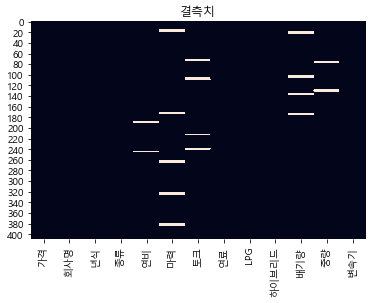

In [257]:
#결측치 시각화
sns.heatmap(df.isnull(), cbar=False) #시본 시각화 확인
plt.title("결측치")
plt.show()

결측치가 심각하게 많은 열은 존재하지 않으므로 열 전체 **제거**는 진행하지 않기로 하고,    
**연비, 마력, 토크, 배기량, 중량** 데이터는 연속형 데이터이기 때문에 **중앙값**의 값으로 **대체**  하기로 하였다.

**결측치 대체**

In [258]:
#연비 대체
df['연비'] = df['연비'].fillna(df['연비'].mean()) #연비의 평균값으로 대체
#마력 대체
df['마력'] = df['마력'].fillna(df['마력'].mean()) #마력의 평균값으로 대체
#토크 대체
df['토크'] = df['토크'].fillna(df['토크'].mean()) #토크의 평균값으로 대체
#배기량 대체
df['배기량'] = df['배기량'].fillna(df['배기량'].mean()) #배기량의 평균값으로 대체
#중량 대체
df['중량'] = df['중량'].fillna(df['중량'].mean()) #중량의 평균값으로 대체

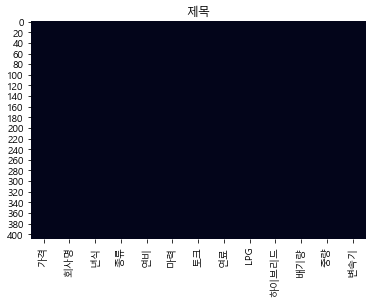

In [259]:
#결측치 처리 최종 확인
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()
plt.title("제목")
plt.show()

결측치 처리 최종 확인 결과 더 이상 결측 데이터가 없음을 알 수 있다.

**이상 데이터**

In [260]:
df.describe() #데이터프레임의 기초 통계 확인

,가격,연비,마력,토크,배기량,중량
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,2161.750611,75.100998,146.955614,24.437817,1859.671795,1447.220551
std,1501.027709,548.635440,58.467400,12.197915,712.190394,406.632713
min,714.000000,6.300000,41.000000,6.700000,796.000000,735.000000
25%,1261.000000,10.700000,108.000000,13.900000,1396.000000,1056.000000
50%,1845.000000,13.100000,141.000000,23.000000,1859.671795,1447.220551
75%,2576.000000,15.000000,175.000000,36.700000,2199.000000,1800.000000
max,14570.000000,5000.000000,425.000000,56.000000,5038.000000,2383.000000


박스플롯을 통해 이상치 데이터가 존재하는지 확인  
**플로틀리**는 인터렉티브한 동적인 효과까지 있어서 box plot을 통해 이상치 데이터들의 실제 **값**까지 쉽게 확인 할 수 있다.

In [261]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=2)

#가격 box plot
fig.add_trace(
    go.Box(y=df.가격, name="가격"),
    row=1, col=1
)

#연비 box plot
fig.add_trace(
    go.Box(y=df.연비, name="연비"),
    row=1, col=2
)

#마력 box plot
fig.add_trace(
    go.Box(y=df.마력, name="마력"),
    row=2, col=1
)

#토크 box plot
fig.add_trace(
    go.Box(y=df.연비, name="토크"),
    row=2, col=2
)

#배기량 box plot
fig.add_trace(
    go.Box(y=df.배기량, name="배기량"),
    row=3, col=1
)

#중량 box plot
fig.add_trace(
    go.Box(y=df.중량, name="중량"),
    row=3, col=2
)

fig.update_layout(height=1200, width=800, title_text="이상 데이터 확인")
fig.show()

데이터를 박스플롯으로 확인한 결과 데이터들을 살펴보면 일부 데이터가 유독 다른 데이터들과 비교되게 큰 값을 가지고 있는 것을 확인 할 수 있다.  
이에 위 데이터 에서는 그 값을 제거하고 진행하기로 하였다.  
가격 제거 기준 : 12K 이상  
연비 제거 기준 : 1000 이상  
토크 제거 기준 : 1000 이상
   
**이상치 제거**

In [262]:
df = df[(df["가격"] < 12000)]
df = df[(df["연비"] < 1000)]
df = df[(df["토크"] < 1000)]

마력, 배기량 박스플롯 결과를 보면 일부 데이터가 매우 큰 값을 가지고 있는것을 알 수 있다.  
한개의 데이터가 아니므로 제거하기보다 평균 값으로 대체하기로 하였다.  

마력 대체 기준 : 400 이상   
배기량 대체 기준 : 4000 이상
  
**이상치 대체**

In [263]:
#마력이 400 미만인 데이터 리스트
list = df[(df["마력"] < 400)].index
#마력의 mean 값으로 초기화
df.loc[list,"마력"] = df['마력'].mean()

#배기량이 400 미만인 데이터 리스트
list = df[(df["배기량"] < 4000)].index
#배기량의 mean 값으로 초기화
df.loc[list,"배기량"] = df['배기량'].mean()

In [264]:
#이상치 처리 최종 확인

fig = make_subplots(rows=3, cols=2)

#가격 box plot
fig.add_trace(
    go.Box(y=df.가격, name="가격"),
    row=1, col=1
)

#연비 box plot
fig.add_trace(
    go.Box(y=df.연비, name="연비"),
    row=1, col=2
)

#마력 box plot
fig.add_trace(
    go.Box(y=df.마력, name="마력"),
    row=2, col=1
)

#토크 box plot
fig.add_trace(
    go.Box(y=df.연비, name="토크"),
    row=2, col=2
)

#배기량 box plot
fig.add_trace(
    go.Box(y=df.배기량, name="배기량"),
    row=3, col=1
)

#중량 box plot
fig.add_trace(
    go.Box(y=df.중량, name="중량"),
    row=3, col=2
)

fig.update_layout(height=1200, width=800, title_text="이상 데이터 확인")
fig.show()

일부 데이터가 또 유독 큰 값을 가지고 있어 이상치 제거 한번더 진행

In [265]:
df = df[(df["연비"] < 30)]
df = df[(df["토크"] < 30)]

In [266]:
#마력이 400 미만인 데이터 리스트
list = df[(df["마력"] < 200)].index
#마력의 mean 값으로 초기화
df.loc[list,"마력"] = df['마력'].mean()

#배기량이 400 미만인 데이터 리스트
list = df[(df["배기량"] < 2000)].index
#배기량의 mean 값으로 초기화
df.loc[list,"배기량"] = df['배기량'].mean()

In [267]:
#이상치 처리 최종 확인

fig = make_subplots(rows=3, cols=2)

#가격 box plot
fig.add_trace(
    go.Box(y=df.가격, name="가격"),
    row=1, col=1
)

#연비 box plot
fig.add_trace(
    go.Box(y=df.연비, name="연비"),
    row=1, col=2
)

#마력 box plot
fig.add_trace(
    go.Box(y=df.마력, name="마력"),
    row=2, col=1
)

#토크 box plot
fig.add_trace(
    go.Box(y=df.연비, name="토크"),
    row=2, col=2
)

#배기량 box plot
fig.add_trace(
    go.Box(y=df.배기량, name="배기량"),
    row=3, col=1
)

#중량 box plot
fig.add_trace(
    go.Box(y=df.중량, name="중량"),
    row=3, col=2
)

fig.update_layout(height=1200, width=800, title_text="이상 데이터 확인")
fig.show()

**중복 데이터**

In [268]:
#중복 데이터가 있는지 확인
#keep 을 False로 하여 모든 중복 데이터를 출력함
display(df[df.duplicated(['가격','회사명','년식','종류', '연비', '마력', '토크', '연료', 'LPG', '하이브리드', '배기량', '중량', '변속기'], keep=False)])#index 값을 제외한 데이터끼리 확인

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기


중복 데이터 확인 결과 중복 데이터가 없음을 알 수 있다.

## 4. 데이터 탐색

##### 파생변수 만들기   
자동차의 마력은 주어진 시간 안에 할 수 있는 일의 총량, 토크는 순간적으로 발휘할 수 있는 힘의 총량을 의미한다.   
마력과 토크 중 하나만 높아서는 자동차의 성능이 좋다고 표현 할 수 없다.   
이론적으로 마력과 토크가 높으면 엔진 성능이 좋다고 볼 수 있기 때문에 **마력**과 **토크** 의 값을 더해서 **마력+토크** 라는 변수를 새로 만들 수 있다.   
**마력+토크** 를 통해서 우리는 **기본적인 자동차의 성능**을 비교해볼 수 있다.

In [269]:
# 마력과 토크의 합계인 총액 (마력+토크)파생변수 만들기
df['마력+토크'] = df['마력'] + df['토크']
df

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기,마력+토크
28,3581,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826
29,3794,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826
35,1365,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1680.0,자동,172.871826
36,1365,기아,2014,대형,10.0,146.371826,26.5,디젤,0,0,1850.068894,1680.0,수동,172.871826
37,1375,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1700.0,자동,172.871826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,146.371826,6.7,LPG,1,0,1850.068894,735.0,수동,153.071826
405,958,대우,2015,경형,9.2,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826
406,964,대우,2015,경형,9.0,146.371826,6.7,LPG,1,0,1850.068894,905.0,수동,153.071826
407,904,대우,2013,경형,9.9,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826


파생변수 데이터 **시각화**  
생성된 파생변수는 **연속형**이기 때문에 ```distplot```으로 **러그**와 **커널 밀도**를 표시해보았다.

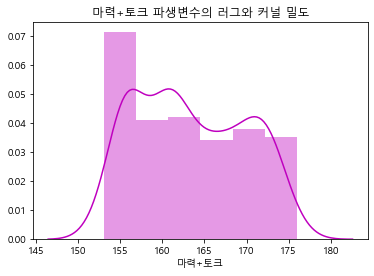

In [270]:
sns.distplot(df['마력+토크'], color="m")
plt.title("마력+토크 파생변수의 러그와 커널 밀도")
plt.show()

In [271]:
df

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기,마력+토크
28,3581,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826
29,3794,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826
35,1365,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1680.0,자동,172.871826
36,1365,기아,2014,대형,10.0,146.371826,26.5,디젤,0,0,1850.068894,1680.0,수동,172.871826
37,1375,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1700.0,자동,172.871826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,146.371826,6.7,LPG,1,0,1850.068894,735.0,수동,153.071826
405,958,대우,2015,경형,9.2,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826
406,964,대우,2015,경형,9.0,146.371826,6.7,LPG,1,0,1850.068894,905.0,수동,153.071826
407,904,대우,2013,경형,9.9,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826


### 데이터 재구조화
**데이터 구간화**

In [272]:
# 전체를 마력+토크를 기준으로 3개 범주로 구분
df_2 = pd.qcut(df["마력+토크"], q=3, labels=["하","중","상"])
df["마력+토크2"] = df_2
df

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기,마력+토크,마력+토크2
28,3581,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826,상
29,3794,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826,상
35,1365,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1680.0,자동,172.871826,상
36,1365,기아,2014,대형,10.0,146.371826,26.5,디젤,0,0,1850.068894,1680.0,수동,172.871826,상
37,1375,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1700.0,자동,172.871826,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,146.371826,6.7,LPG,1,0,1850.068894,735.0,수동,153.071826,하
405,958,대우,2015,경형,9.2,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826,하
406,964,대우,2015,경형,9.0,146.371826,6.7,LPG,1,0,1850.068894,905.0,수동,153.071826,하
407,904,대우,2013,경형,9.9,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826,하


In [273]:
#그룹별로 마력+토크에 대한 통계량 계산
group1 = df['마력+토크'].groupby(df['마력+토크2'])
group1.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
마력+토크2,,,,,
하,111,157.152006,2.312371,153.071826,160.271826
중,69,163.622551,2.051586,160.371826,166.771826
상,88,171.064636,2.232046,166.871826,175.971826


마력+토크를 동일 개수로 나눈 3개의 그룹별 통계량을 확인해보면  
1번 그룹은 **평균 157**  
2번 그룹은 **평균 163**  
3번 그룹은 **평균 171**  
의 값을 가지고 있는 것을 확인 할 수 있다.

그룹별로 마력+토크가 어떻게 분포되어있는지 알기 위해서 **시각화**를 이용해 보기로 하였다.  
그룹은 범주형이고 마력+토크는 연속형이기 때문에 **범주형**과 **연속형**을 함께 표현할 수 있는 ```swarmplot```을 사용하기로 하였다.  
```swarmplot```은 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동하여 표현하기 때문에 데이터의 분포를 효과적으로 파악할 수 있다.

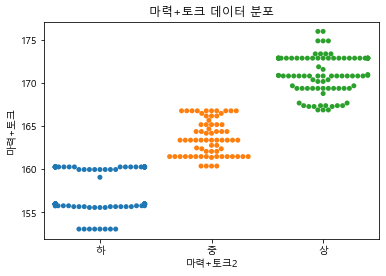

In [274]:
sns.swarmplot(x='마력+토크2', y='마력+토크', data=df)
plt.title("마력+토크 데이터 분포")
plt.show()

**피봇 테이블**

In [275]:
df.pivot_table(index='연료', columns='배기량', values='마력+토크') #연료 변수를 행 데이터로 피봇

배기량,1850.068894
연료,
LPG,160.483591
가솔린,161.681038
디젤,172.050031


피봇 테이블을 확인해보면 보편적으로 디젤의 마력이 높은 것을 알 수 있다.
따라서 연료를 디젤을 사용할 경우 자동차의 성능이 조금 더 높은 것을 알 수 있다.
   
위 피봇 테이블의 값은 아래처럼 **시각화**를 통해서 한눈에 보이게 만들 수 있다.

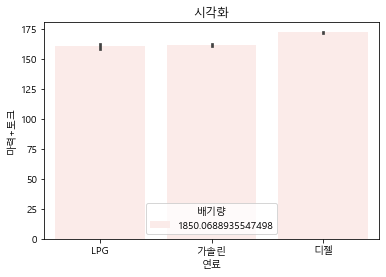

In [277]:
sns.barplot(x="연료", y="마력+토크", hue="배기량", color="salmon", data=df)
plt.title("시각화")
plt.show()

### 데이터 그룹 분석

In [278]:
df

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기,마력+토크,마력+토크2
28,3581,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826,상
29,3794,대우,2015,대형,9.4,146.371826,29.6,가솔린,0,0,1850.068894,1725.0,자동,175.971826,상
35,1365,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1680.0,자동,172.871826,상
36,1365,기아,2014,대형,10.0,146.371826,26.5,디젤,0,0,1850.068894,1680.0,수동,172.871826,상
37,1375,기아,2014,대형,9.2,146.371826,26.5,디젤,0,0,1850.068894,1700.0,자동,172.871826,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,146.371826,6.7,LPG,1,0,1850.068894,735.0,수동,153.071826,하
405,958,대우,2015,경형,9.2,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826,하
406,964,대우,2015,경형,9.0,146.371826,6.7,LPG,1,0,1850.068894,905.0,수동,153.071826,하
407,904,대우,2013,경형,9.9,146.371826,6.7,LPG,1,0,1850.068894,865.0,수동,153.071826,하


데이터를 확인해보니 **종류**에 대한 **가격**을 통해서 평균적으로 **사람들이 얼마정도에 자동차를 샀는지** 알고 싶어졌다.  
이를 ```groupby```를 통해 알아보고자 한다.  

In [279]:
df1 = df['가격'].groupby(df['종류'])

In [281]:
#자동차별 요금 평균
df['가격'].groupby(df['종류']).mean()

종류
경형     1013.493506
대형     2087.872727
소형     1330.083333
준중형    1821.687500
중형     2614.062500
Name: 가격, dtype: float64

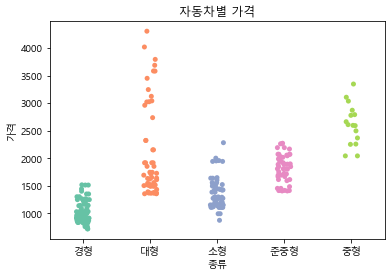

In [282]:
sns.stripplot(x='종류', y='가격', data=df, palette="Set2")
plt.title("자동차별 가격")
plt.show()

좌석등급별 요금의 분포를 ```stripplot```으로 확인한 결과 경형이 대체로 낮은 가격대로 분포되어 있고, 대형의 경우 가격 분포가 조금 다양하게 나타나는 것을 알 수 있었다.

In [283]:
#좌석등급 빈도 파악
df['가격'].groupby(df['종류']).count()

종류
경형     77
대형     55
소형     72
준중형    48
중형     16
Name: 가격, dtype: int64

주어진 데이터에는 중형 자동차의 데이터가 적은것으로 보아 시중 자동차는 중형을 많이 만들지 않는다고 파악할 수 있다.

### 다변량 시각화로 데이터 탐색
```pairplot```을 사용하여 연속형으로 이루어져 있는 데이터들의 조합을 한번에 보기로 하였다.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\dahyun\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



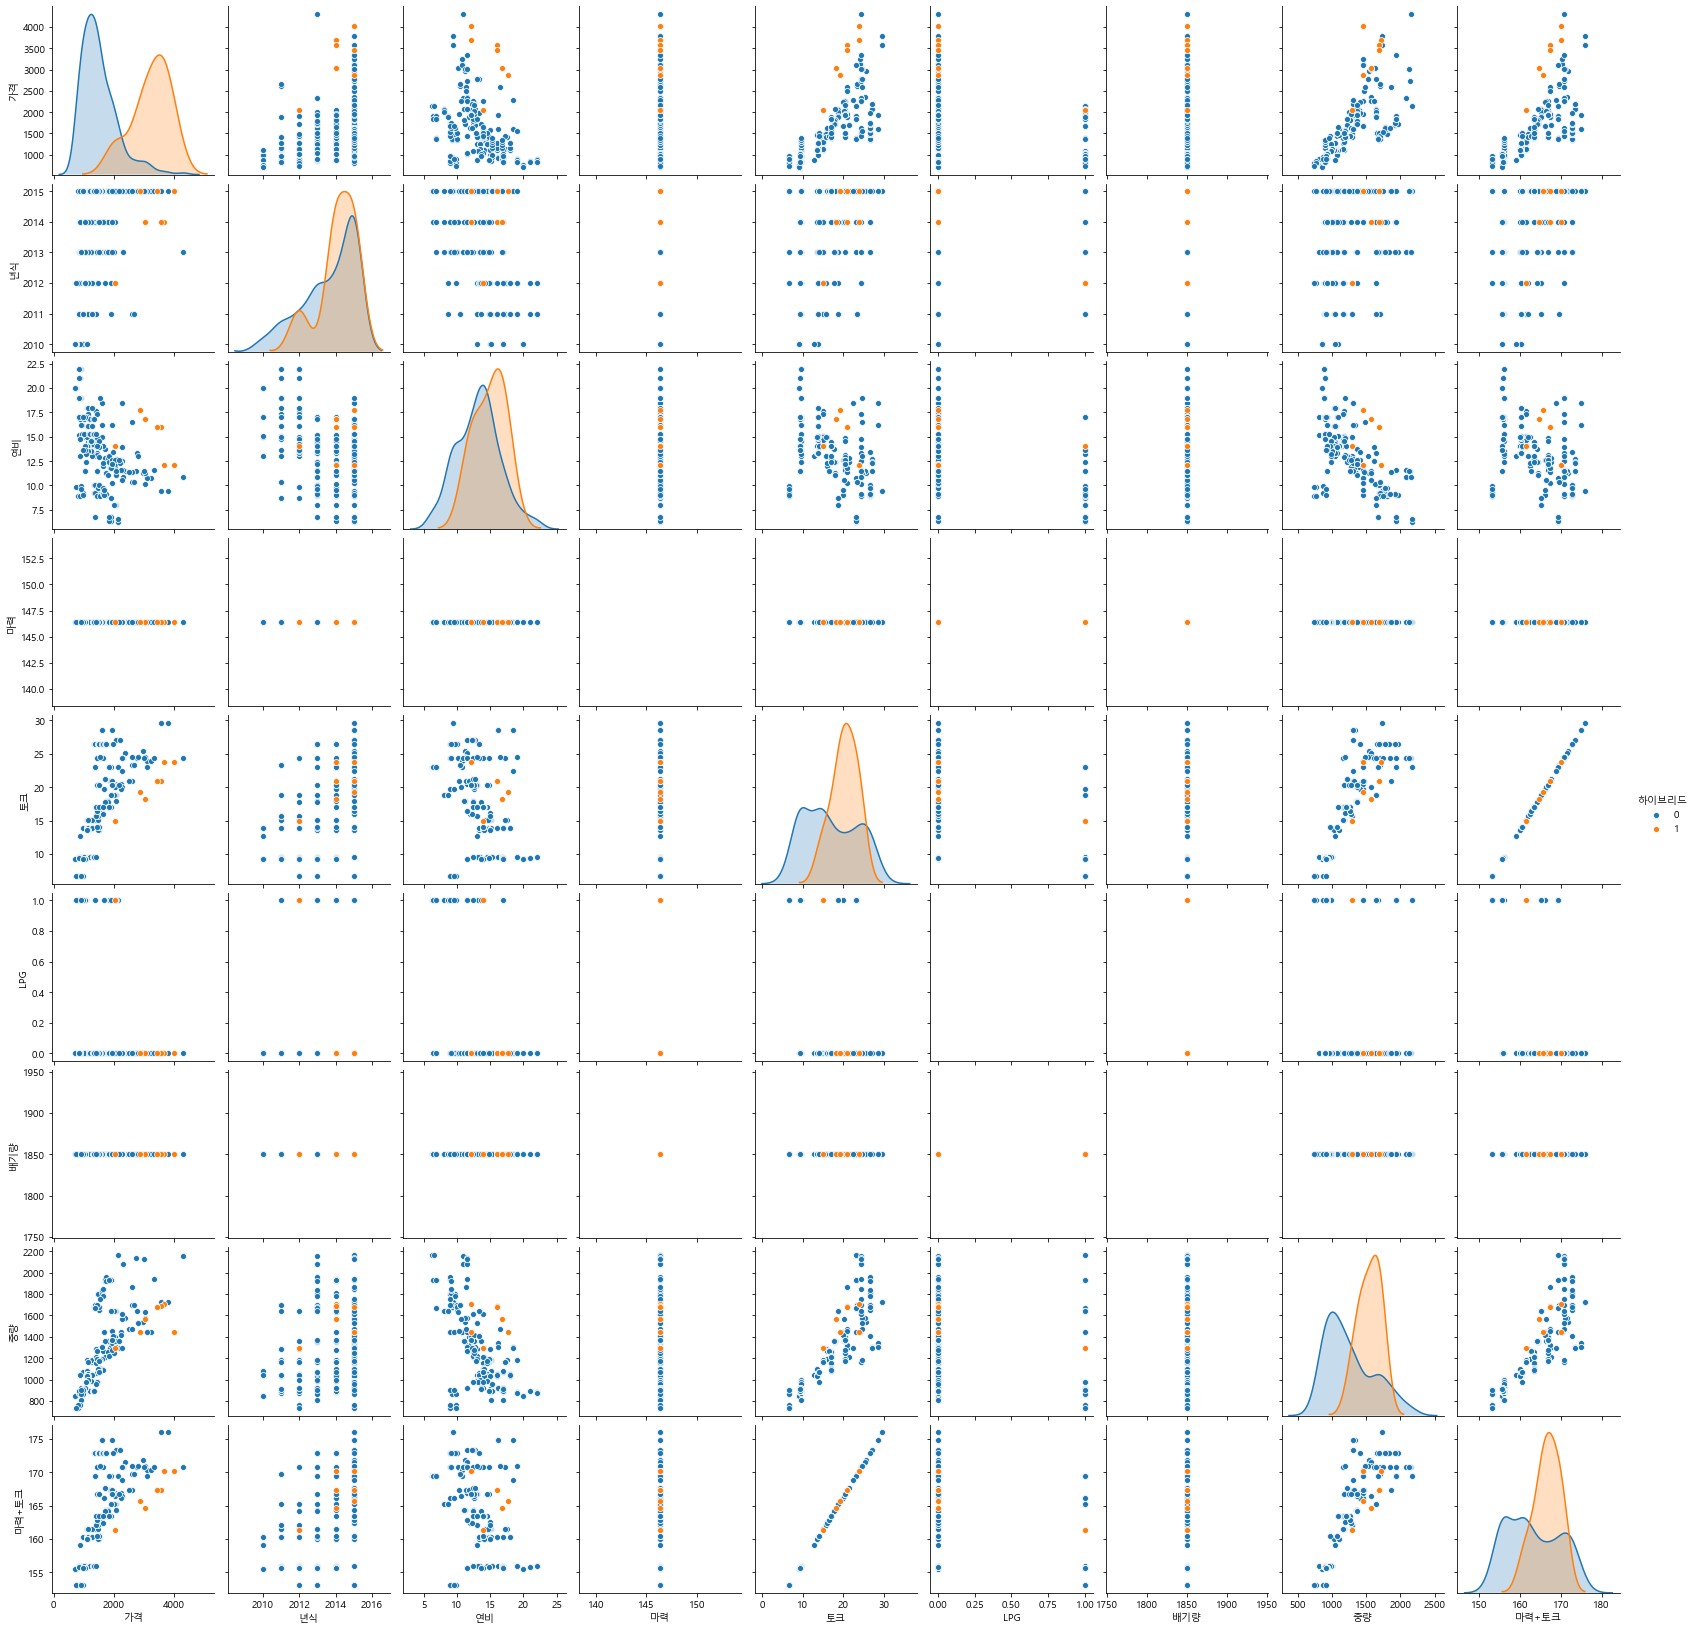

In [287]:
sns.pairplot(df, hue="하이브리드")

**가격**과 **연비**는 연속형 데이터 이기 때문에 시본에서 조인트플롯을 이용하기로 하였다.

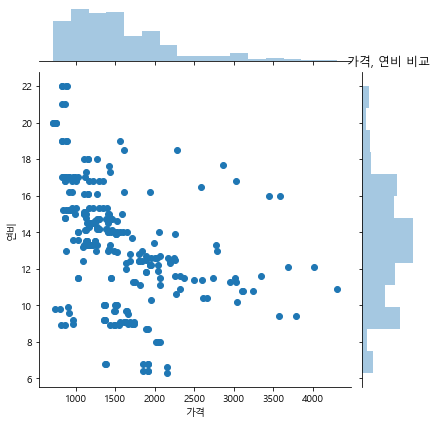

In [288]:
sns.jointplot(x="가격", y="연비", data=df)
plt.title("가격, 연비 비교")
plt.show()

위 그래프를 보면 겹쳐져서 표현되는 데이터가 있어 커널 밀도 히스토그램인 kde를 통해 같이 비교하기로 하였다.

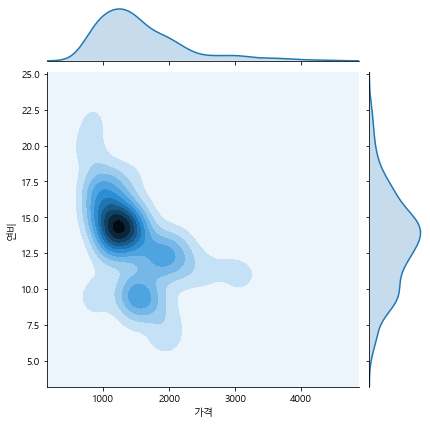

In [289]:
sns.jointplot(x="가격", y="연비", data=df, kind="kde")
plt.show()

연비 15부근에 사이에 값이 몰려 있다.

## 본인만의 차별화